In [1]:
from __future__ import print_function

import time
import init_paths
import skimage.io as skio
import matplotlib.pyplot as plt
import demo

## Initialize Demo Solver

In [2]:
# Arg: quality and num_per_dim -> tradeoffs between quality and time spent running 
# quality affects dense=False, and num_per_dim affects dense=True
ckpt_path = './ckpt/exif_final/exif_final.ckpt'
exif_demo = demo.Demo(ckpt_path=ckpt_path, use_gpu=0, quality=3.0, num_per_dim=30)

Initializing graph on gpu 0
INFO:tensorflow:Restoring parameters from ./ckpt/exif_final/exif_final.ckpt
unknown checkpoint string format ./ckpt/exif_final/exif_final.ckpt setting iteration to 0
Succesfully resuming from ./ckpt/exif_final/exif_final.ckpt


## Run examples
This takes some time be patient :) 

In [3]:
# MeanShift + dense affinities (as described in our paper)
ms_st = time.time()
im1, res1 = exif_demo('./images/demo.png', dense=True) # Upsampled via bilinear upsampling
print('MeanShift run time: %.3f' % (time.time() - ms_st))

# DBSCAN + sparse anchors
db_st = time.time()
im2, res2 = exif_demo('./images/demo.png', dense=False) # No upsampling
print('DBSCAN run time: %.3f' % (time.time() - db_st))

MeanShift run time: 61.946
DBSCAN run time: 13.102


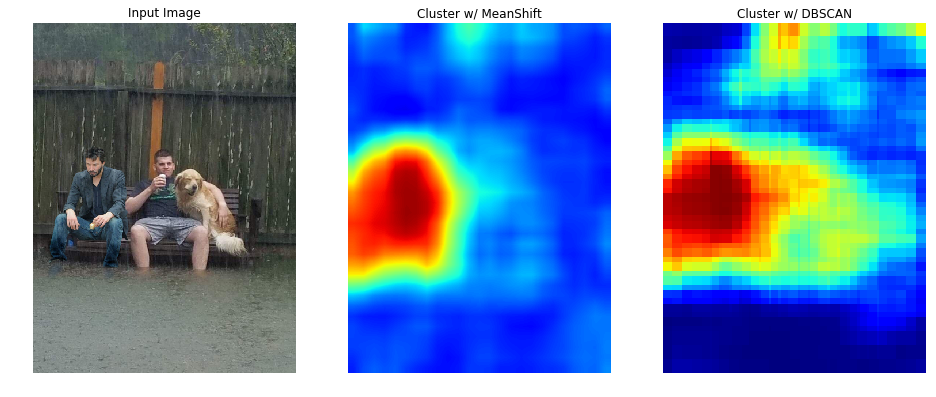

In [4]:
% matplotlib inline
plt.subplots(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(im1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Cluster w/ MeanShift')
plt.axis('off')
plt.imshow(1.0 - res1, cmap='jet', vmin=0.0, vmax=1.0)

plt.subplot(1, 3, 3)
plt.title('Cluster w/ DBSCAN')
plt.axis('off')
plt.imshow(1.0 - res2, cmap='jet', vmin=0.0, vmax=1.0)

plt.show()